## Integrantes:
- Alvaro Zarabanda 20161020507
- Alejandro Cortazar 20181020022
- Johnatan Ruiz 20181020034

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install snscrape
!pip install spacy
!spacy download es_core_news_md
exit()

     |████████████████████████████████| 78.4 MB 1.2 MB/s 
  Created wheel for es-core-news-md: filename=es_core_news_md-2.2.5-py3-none-any.whl size=79649484 sha256=fe788b3a1664c1616714e226feeb4e833bb9acd2089d0f5df419b69c687a781e
  Stored in directory: /tmp/pip-ephem-wheel-cache-adkzy90o/wheels/d8/f5/92/ee8a4f74fac67775fbc0314b1c9ae4694f4180437f6fc3dd1c
Successfully built es-core-news-md
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import re
import spacy

## Recopilacion de Tweets

In [ ]:
def getTweets():
    tweets_list = []
    # TwitterSearchScraper para crear una lista de tweets
    for i, tweet in enumerate(sntwitter.TwitterSearchScraper('Francia Marquez').get_items()):  # declare a username
        if i > 200:  # numero de tweets
            break
        tweets_list.append(
            [tweet.date, tweet.username, tweet.content])  # atributos del tweet

    # Se crea el dataframe con los tweets

    df = pd.DataFrame(tweets_list, columns=['Fecha', 'Usuario', 'Texto'])
    return df

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Varios/data.csv')
data.head(5)

,Unnamed: 0,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,outlinks,tcooutlinks,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card
0,0,https://twitter.com/jurycb/status/149630012278...,2022-02-23 01:45:23+00:00,@petrogustavo @CMILANOTICIA @CaracolRadio @Ali...,@petrogustavo @CMILANOTICIA @CaracolRadio @Ali...,1496300122782769152,"{'username': 'jurycb', 'id': 567326020, 'displ...",0,0,0,0,1496292128653287425,es,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,NaN,NaN,NaN,1.496292e+18,"{'username': 'petrogustavo', 'id': 49849732, '...","[{'username': 'petrogustavo', 'id': 49849732, ...",NaN,NaN,NaN,NaN,NaN
1,1,https://twitter.com/DrBanner84/status/14962993...,2022-02-23 01:42:26+00:00,Ya salió Francia Márquez a llorar lágrimas anc...,Ya salió Francia Márquez a llorar lágrimas anc...,1496299380281856000,"{'username': 'DrBanner84', 'id': 222233509, 'd...",0,0,0,0,1496299380281856000,es,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,https://twitter.com/Margari58430171/status/149...,2022-02-23 01:38:08+00:00,@IvanCepedaCast @petrogustavo Es muy aburrido....,@IvanCepedaCast @petrogustavo Es muy aburrido....,1496298296809246723,"{'username': 'Margari58430171', 'id': 13911967...",0,0,0,0,1496294569733984260,es,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,NaN,NaN,NaN,1.496295e+18,"{'username': 'IvanCepedaCast', 'id': 98781946,...","[{'username': 'IvanCepedaCast', 'id': 98781946...",NaN,NaN,NaN,NaN,NaN
3,3,https://twitter.com/gbeusse/status/14962955702...,2022-02-23 01:27:18+00:00,@profeUribista Francia Marquez no solo es una ...,@profeUribista Francia Marquez no solo es una ...,1496295570289405963,"{'username': 'gbeusse', 'id': 1962790843, 'dis...",0,0,1,0,1496249614927896583,es,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,NaN,NaN,NaN,NaN,NaN,1.496250e+18,"{'username': 'profeUribista', 'id': 564155598,...","[{'username': 'profeUribista', 'id': 564155598...",NaN,NaN,NaN,NaN,NaN
4,4,https://twitter.com/desflorecemos/status/14962...,2022-02-23 01:26:07+00:00,Francia Márquez es la mujer que necesito en el...,Francia Márquez es la mujer que necesito en el...,1496295272351248384,"{'username': 'desflorecemos', 'id': 1382522267...",0,0,0,0,1496295272351248384,es,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocesamiento

In [ ]:
df = data[['date', 'id', 'content']][(data['lang'] == 'es') & ((data['retweetCount'] > 3) | (data['likeCount'] > 3))]
df.index = np.arange(len(df))
print(len(df))
df.head(5)

2624


,date,id,content
0,2022-02-23 00:51:09+00:00,1496286474324615172,"Dizque ""Francia vicepresidenta"". Parce, si Fra..."
1,2022-02-23 00:15:54+00:00,1496277602029477893,Las noticias de mi país:\n1. Gustavo Petro hab...
2,2022-02-22 23:43:33+00:00,1496269461002797061,Los nadies seguimos en la juntanza tejiendo am...
3,2022-02-22 23:35:53+00:00,1496267532491231235,"✒️🗒 | Francia Márquez, precandidata a la presi..."
4,2022-02-22 23:32:47+00:00,1496266752031875073,"El cambio que merecemos en Colombia 🇨🇴, será c..."


In [ ]:
def clean(text):
  text = re.sub('@[A-Za-z0–9]+', '', text) #Remover @mentions
  text = re.sub('#\w+\s*', '', text) # Remover '#' hash tag
  text = re.sub('RT[\s]+', '', text) # Remover RT
  text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text) # Remover hyperlink
  text = re.sub('\n', ' ', text)
  text = text.lower()
  text = re.sub('francia m([a]|[á])rquez', '', text)
  text = re.sub('francia', '', text)
  text = re.sub('á', 'a', text)
  text = re.sub('é', 'e', text)
  text = re.sub('í', 'i', text)
  text = re.sub('ó', 'o', text)
  text = re.sub('ú', 'u', text)
  text = re.sub('ü', 'u', text)
  text = re.sub('[^a-zA-Z\s]', '', text)
  text = re.sub('[ ]{2,}', ' ', text)
  text = text.strip()
  
  return text

In [ ]:
df['content'] = df['content'].apply(clean)

df.head(15)

,date,id,content
0,2022-02-23 00:51:09+00:00,1496286474324615172,dizque vicepresidenta parce si no gana la cons...
1,2022-02-23 00:15:54+00:00,1496277602029477893,las noticias de mi pais gustavo petro habla so...
2,2022-02-22 23:43:33+00:00,1496269461002797061,los nadies seguimos en la juntanza tejiendo am...
3,2022-02-22 23:35:53+00:00,1496267532491231235,precandidata a la presidencia hablo con la uip...
4,2022-02-22 23:32:47+00:00,1496266752031875073,el cambio que merecemos en colombia sera con l...
5,2022-02-22 22:24:41+00:00,1496249614927896583,dios mio esos mamertopithecus diciendo que se ...
6,2022-02-22 22:20:24+00:00,1496248537285382147,siempre he querido hablar sobre el lenguaje co...
7,2022-02-22 21:48:36+00:00,1496240533777305605,esta haciendo politica como si estuvieramos en...
8,2022-02-22 21:46:12+00:00,1496239927184474120,camilo romero carlos caicedo hollman morris
9,2022-02-22 21:34:15+00:00,1496236919562330113,huy siiiiii carlos caicedo camilo romero danie...


##Frecuencia de Palabras

In [ ]:
# cargamos el modelo entrenado en español
nlp = spacy.load("es_core_news_md")
nlp.Defaults.stop_words = nlp.Defaults.stop_words.union({'a', 'y', 'o'})

In [ ]:
all_text = nlp(' '.join(df['content']))

In [ ]:
from collections import Counter

words = [token.text
         for token in all_text
         if token.text not in nlp.Defaults.stop_words]

word_freq = Counter(words)
common_words = word_freq.most_common(20)
common_words

[('pacto', 505),
 ('petro', 456),
 ('marca', 276),
 ('cambio', 230),
 ('colombia', 198),
 ('historico', 193),
 ('debate', 186),
 ('consulta', 184),
 ('politica', 174),
 ('ingrid', 163),
 ('camilo', 148),
 ('romero', 148),
 ('gustavo', 146),
 ('polo', 146),
 ('marzo', 138),
 ('votar', 136),
 ('mujer', 126),
 ('presidenta', 123),
 ('aos', 113),
 ('realidad', 104)]

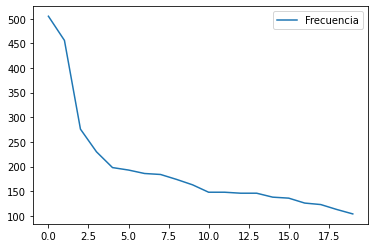

In [ ]:
pd.DataFrame(common_words, columns=['Palabra', 'Frecuencia']).plot()

## Frecuencia luego de Lematizar

In [ ]:
words = [token.lemma_ for token in all_text
         if token.lemma_ not in nlp.Defaults.stop_words and token.pos_ != 'PRON']

word_freq = Counter(words)
common_words = word_freq.most_common(20)
common_words

[('pactar', 596),
 ('parir', 531),
 ('petro', 456),
 ('comer', 360),
 ('votar', 288),
 ('marcar', 283),
 ('cambiar', 253),
 ('debatir', 225),
 ('mujer', 217),
 ('candidato', 205),
 ('colombia', 198),
 ('presidente', 194),
 ('historico', 193),
 ('consultar', 191),
 ('politica', 174),
 ('ingrid', 163),
 ('pasar', 151),
 ('hablar', 150),
 ('camilo', 148),
 ('romero', 148)]

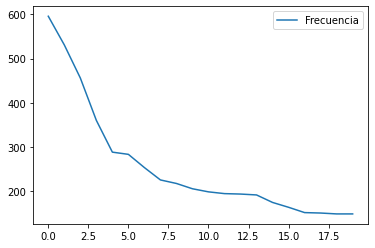

In [ ]:
pd.DataFrame(common_words, columns=['Palabra', 'Frecuencia']).plot()

## Análisis de Sentimientos

In [ ]:
!pip install pysentimiento

     |████████████████████████████████| 3.5 MB 38.2 MB/s 
     |████████████████████████████████| 311 kB 32.3 MB/s 
     |████████████████████████████████| 174 kB 55.3 MB/s 
     |████████████████████████████████| 134 kB 46.6 MB/s 
     |████████████████████████████████| 67 kB 4.7 MB/s 
     |████████████████████████████████| 1.1 MB 48.2 MB/s 
     |████████████████████████████████| 243 kB 57.9 MB/s 
     |████████████████████████████████| 596 kB 42.8 MB/s 
     |████████████████████████████████| 6.8 MB 28.4 MB/s 
     |████████████████████████████████| 895 kB 37.2 MB/s 
     |████████████████████████████████| 94 kB 1.8 MB/s 
     |████████████████████████████████| 144 kB 38.6 MB/s 
     |████████████████████████████████| 271 kB 40.0 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=1902b9a48a8cabf45e4ebedf9496e3d81bc41dbb3ea0470afdcfde01a2ae9fff
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f58

In [ ]:
from pysentimiento.preprocessing import preprocess_tweet
from pysentimiento import create_analyzer

analyzer = create_analyzer(task="sentiment", lang="es")
df = data[['date', 'id', 'content']][(data['lang'] == 'es') & ((data['retweetCount'] > 3) | (data['likeCount'] > 3))]
df.index = np.arange(len(df))

loading file https://huggingface.co/pysentimiento/robertuito-sentiment-analysis/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/pysentimiento/robertuito-sentiment-analysis/resolve/main/special_tokens_map.json from cache at /root/.cache/huggingface/transformers/25e0e805456d2786a12b70b86278c6e839d19958cb4f541ee1f78621140098f7.0dc5b1041f62041ebbd23b1297f2f573769d5c97d8b7c28180ec86b8f6185aa8
loading file https://huggingface.co/pysentimiento/robertuito-sentiment-analysis/resolve/main/tokenizer_config.json from cache at /root/.cache/huggingface/transformers/4fdf9a5a8e0a6023e1a9cdef62921158c3db9545e73f8dc0f46340a21bbb64d5.50a2bcf7668df2ff5a82b7b0455533bb4c0db21e6e33565fa20fd7dc8a3be740
loading file https://huggingface.co/pysentimiento/robertuito-sentiment-analysis/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/47dd2d3180a6186d30715516321375322e3a84d5e4656762e083091bbb5d5dc4.0843b07596b388e054bae078721182b4846b9e28a7bbf04d7

In [ ]:
def sentiment_analysis(text):
  text = preprocess_tweet(text, shorten=2)
  return getattr(analyzer.predict(text), 'output')

def sentiment_value(sentiment):
  value = 0
  if sentiment == 'POS':
    value += 1
  elif sentiment == 'NEG':
    value -= 1

  return value
  

In [ ]:
df['sentiment'] = df['content'].apply(sentiment_analysis)

In [ ]:
df['sent_val'] = df['sentiment'].apply(sentiment_value)

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/Varios/sentimientos.pkl')

In [ ]:
df.tail(5)

,date,id,content,sentiment,sent_val
2619,2022-01-25 17:10:04+00:00,1486023578717990915,Francia Márquez en qué momento se volvió “pres...,NEU,0
2620,2022-01-25 17:10:02+00:00,1486023568701984775,Pobre Ingrid Betancourt y Alejandro Gaviria te...,NEG,-1
2621,2022-01-25 17:07:44+00:00,1486022988168318983,¿Qué tienen en común Francia Márquez y Rodolfo...,NEG,-1
2622,2022-01-25 17:05:55+00:00,1486022531953868800,"Petro diciendo estupideces demagogicas, es una...",NEG,-1
2623,2022-01-25 16:55:33+00:00,1486019923059032064,Me gusta mucho como viste Francia Márquez para...,POS,1


In [ ]:
df.groupby('sentiment')['sentiment'].count()

sentiment
NEG    1088
NEU    1187
POS     349
Name: sentiment, dtype: int64

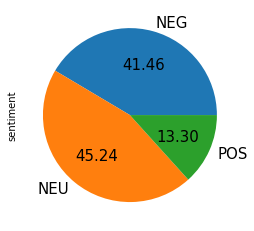

In [ ]:
df.groupby('sentiment')['sentiment'].count().plot.pie(autopct='%.2f', fontsize=15, )

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.resample('W', on='date')[['sent_val']].mean()

,sent_val
date,
2022-01-30 00:00:00+00:00,-0.324352
2022-02-06 00:00:00+00:00,-0.255521
2022-02-13 00:00:00+00:00,-0.223744
2022-02-20 00:00:00+00:00,-0.270748
2022-02-27 00:00:00+00:00,-0.284024
